# Intro

To test the value generation codes.

---
# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from popy.behavior_data_tools import *
from popy.io_tools import load_behavior

---
# Section 1: Value related codes

Including history of outcomes, Strategy value, Q-values, etc

In [2]:
monkey, session = 'ka', '230520'
behav = load_behavior(monkey, session)
behav = drop_time_fields(behav)
behav

,monkey,session,trial_id,block_id,best_target,target,feedback
17967,ka,230520,0,0,3,3.0,1.0
17968,ka,230520,1,0,3,3.0,1.0
17969,ka,230520,2,0,3,3.0,0.0
17970,ka,230520,3,0,3,3.0,1.0
17971,ka,230520,4,0,3,3.0,0.0
...,...,...,...,...,...,...,...
18382,ka,230520,415,9,3,3.0,1.0
18383,ka,230520,416,9,3,3.0,1.0
18384,ka,230520,417,9,3,3.0,0.0
18385,ka,230520,418,9,3,3.0,0.0


In [3]:
#behav = add_history_of_feedback(behav, num_trials=5, one_column=False, coding=(-10, 1))
behav = add_q_values(behav, monkey='ka', coding=(0, 1))
behav = add_value_function(behav, monkey='ka')

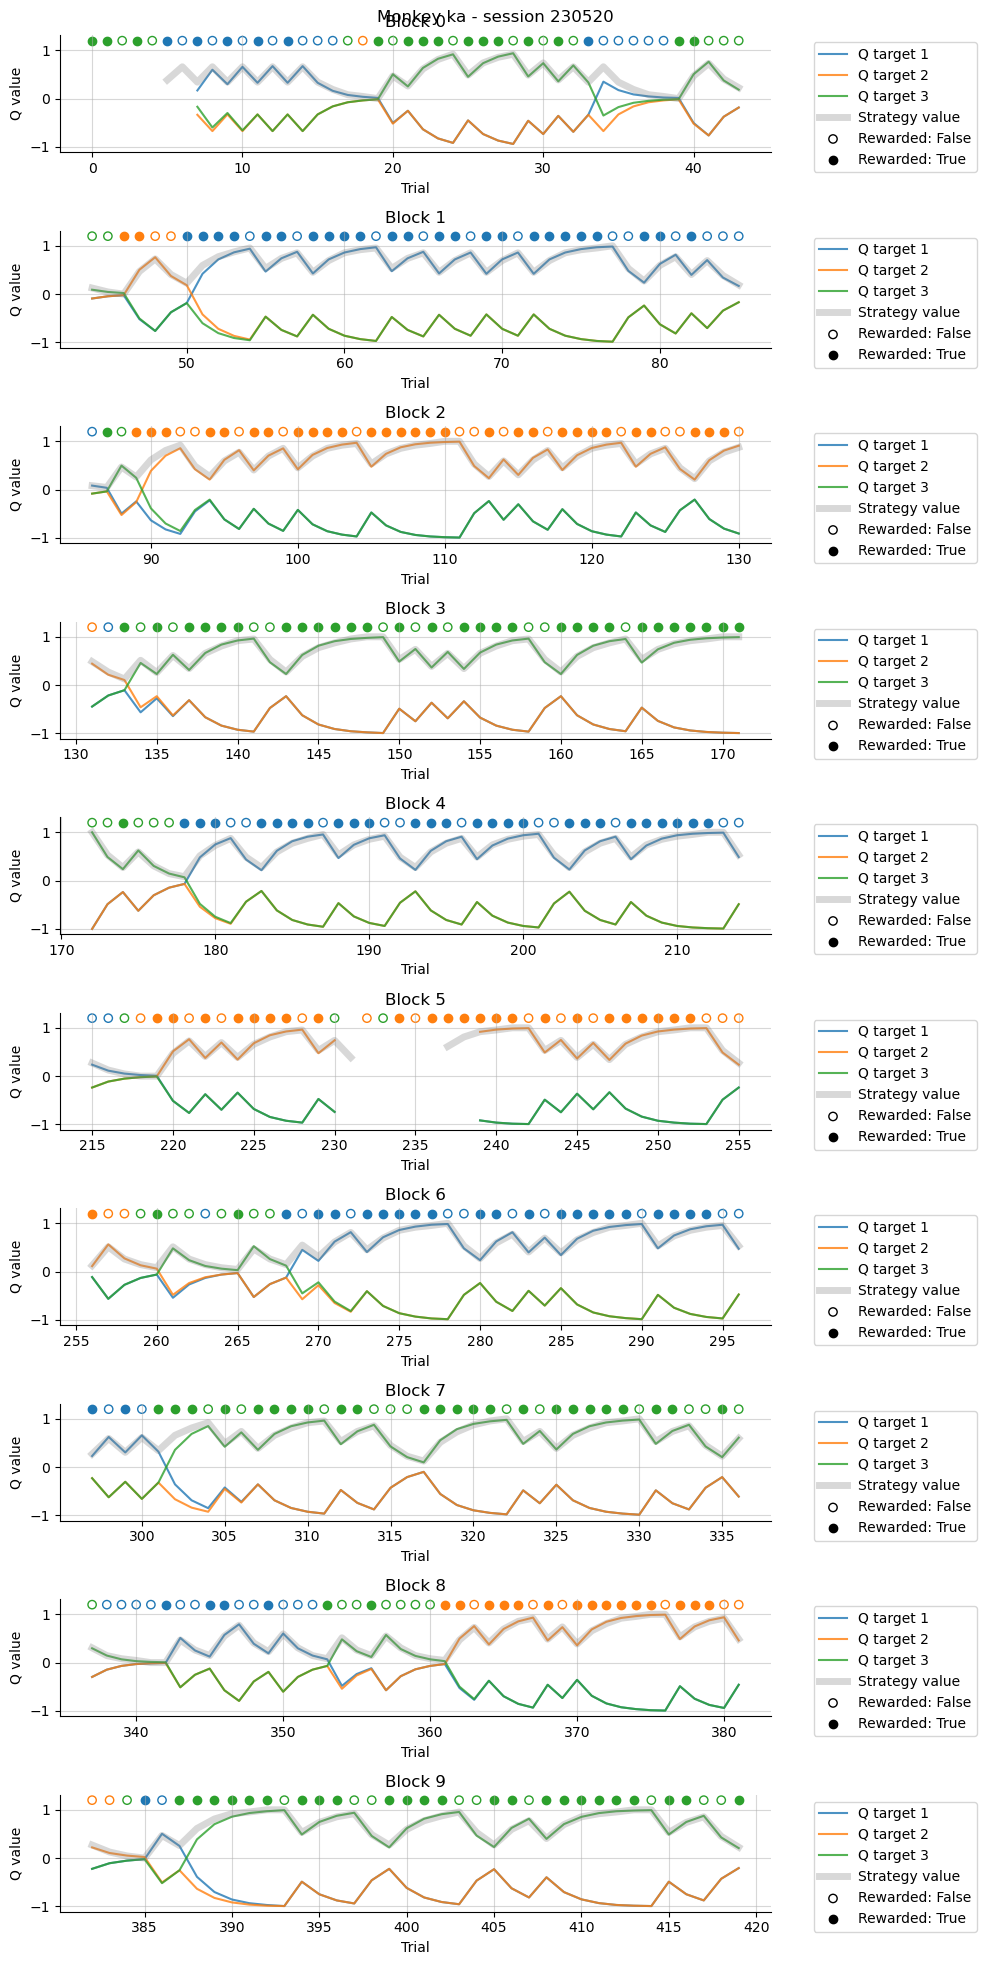

In [4]:
# plot q-values and value function
n_blocks = len(behav['block_id'].unique())

target_colors = {1: 'tab:blue', 2: 'tab:orange', 3: 'tab:green'}
feedback_markers = {0: 'o', 1: 'o'}

fig, axs = plt.subplots(n_blocks, 1, figsize=(10, 20), sharex=False, sharey=True)

for i, (block_id, behav_block) in enumerate(behav.groupby('block_id')):
    ax = axs[i]
    for j, target in enumerate([1,2,3]):
        ax.plot(behav_block['trial_id'], behav_block['Q_{}'.format(target)], label='Q target {}'.format(target), color=target_colors[target], alpha=.8)
    
    ax.plot(behav_block['trial_id'], behav_block['value_function'], label='Strategy value', color='grey', alpha=0.3, linewidth=5)

    for target, color in target_colors.items():
        for feedback, marker in feedback_markers.items():
            mask = (behav_block['target'] == target) & (behav_block['feedback'] == feedback)
            ax.scatter(behav_block[mask]['trial_id'], np.ones(len(behav_block[mask]))*1.2, color=color, marker=marker, facecolors='none' if feedback == 0 else color)

    # add a second column to the legend: feedback, in black
    for feedback, marker in feedback_markers.items():
        ax.scatter([], [], color='black', marker=marker, facecolors='none' if feedback == 0 else 'black', label='Rewarded: {}'.format(bool(feedback)))

    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
    ax.grid(alpha=0.5)
    ax.set_title(f'Block {block_id}')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Trial')
    ax.set_ylabel('Q value')

plt.suptitle(f'Monkey {monkey} - session {session}')
plt.tight_layout()
plt.show()


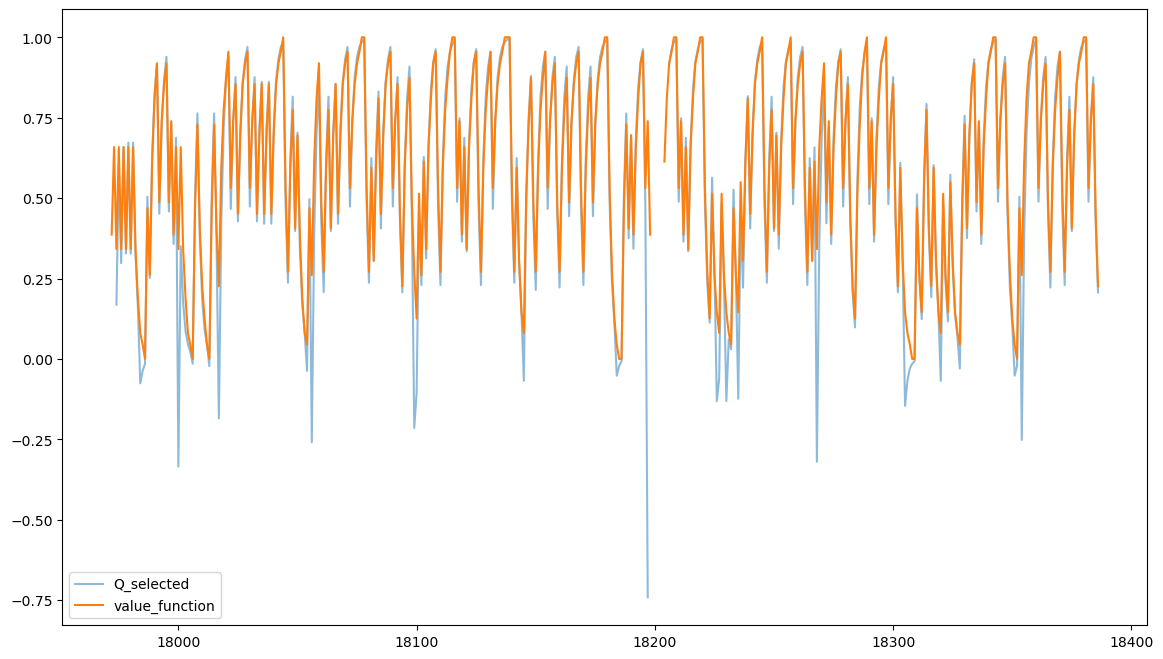

In [5]:
# plot q-values and value function
plt.figure(figsize=(14, 8))
plt.plot(behav['Q_selected'], label='Q_selected', alpha=0.5)
plt.plot(behav['value_function'], label='value_function')

plt.legend()
